## Reading data from CSV in Python


In [ ]:
# ...existing code...
import requests
import pandas as pd
import numpy as np

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/addresses.csv"

def download(url, filename):
    resp = requests.get(url)
    if resp.status_code == 200:
        with open(filename, "wb") as f:
            f.write(resp.content)
    else:
        print("ERROR", resp.status_code)

download(url, "dskAddress.csv")
# ...existing code...

address_data = pd.read_csv("dskAddress.csv")
address_data.columns = ['First Name', 'Last Name', 'Location ', 'City','State','Area Code']

0                        220 hobo Av.
1                   120 Jefferson St.
2    7452 Terrace "At the Plaza" road
3                                 NaN
4                 9th, at Terrace plc
Name: Location , dtype: object

# Writing JSON to a File

This is usually called **serialization**. It is the process of converting an object into a special format which is suitable for transmitting over the network or storing in file or database.

To handle the data flow in a file, the JSON library in Python uses the **dump()** or **dumps()** function to convert the Python objects into their respective JSON object. This makes it easy to write data to files.


In [20]:
import json

person = {
    'first_name' : 'Mark',
    'last_name' : 'abc',
    'age' : 27,
    'address': {
        "streetAddress": "21 2nd Street",
        "city": "New York",
        "state": "NY",
        "postalCode": "10021-3100"
    }
}


with open("person.json","w") as f:
    json.dump(person,f)


with open("person.json","r") as f:
    person_data = json.load(f)

person_data['address']

{'streetAddress': '21 2nd Street',
 'city': 'New York',
 'state': 'NY',
 'postalCode': '10021-3100'}

Data Analysis
In this section, you will learn how to approach data acquisition in various ways and obtain necessary insights from a dataset. By the end of this lab, you will successfully load the data into Jupyter Notebook and gain some fundamental insights via the Pandas Library.

In our case, the Diabetes Dataset is an online source and it is in CSV (comma separated value) format. Let's use this dataset as an example to practice data reading.

About this Dataset
Context: This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years of age of Pima Indian heritage.

Content: The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

We have 768 rows and 9 columns. The first 8 columns represent the features and the last column represent the target/label.

In [27]:


fileURL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/diabetes.csv"
fileName = "patientdiabeticsdata.csv"

def getFile(fileURL,fileName):
    response = requests.get(fileURL)
    if response.status_code == 200:
        request_data = response.content
        with open(fileName,"wb") as f:
            f.write(request_data)

getFile(fileURL,fileName)

with open(fileName,"r") as f:
    patient_df = pd.read_csv(f)

patient_df['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

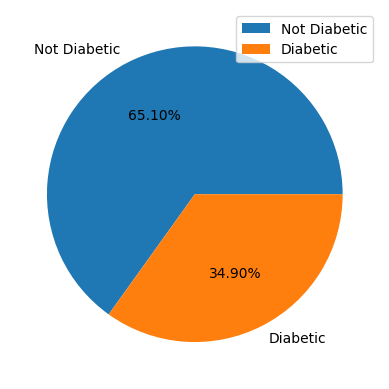

In [28]:
import matplotlib.pyplot as plt
import seaborn as sb

labels= 'Not Diabetic','Diabetic'
plt.pie(patient_df['Outcome'].value_counts(),labels=labels,autopct='%0.02f%%')
plt.legend()
plt.show()